Problem 1 : Write a program (please attach a printout) which implements the error function and, if needed, its gradient, produces a plot of the function obtained, evaluate the value of the training error and of the test error, analyse the occurrence of overfitting/underfitting varying the number of neurons N and of the parameters µ.
\vspace{5mm}

In [1]:
%matplotlib inline
from scipy.optimize import basinhopping
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from __future__ import division
from scipy.optimize import minimize
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import time
import codecs

\vspace{5mm}
Generating the dataset : 
\vspace{5mm}

In [2]:
frank_function = lambda x1,x2 : 0.75*np.exp(((-(9*x1 - 2)**2)/4)
                                            - ((9*x2 - 2)**2)/4)+ 0.75*np.exp(((-(9*x1 + 1)**2)/49)
                                            - (9*x2 + 1)/10) + 0.5*np.exp(((-(9*x1 - 7)**2)/4) 
                                            - ((9*x2 - 3)**2)/4) - 0.2*np.exp(((-(9*x1 - 4)**2) - (9*x2 - 7)**2))
noise = np.random.random(100)
x1 = np.random.random(100) 
x2 = np.random.random(100)
y = frank_function(x1,x2) + noise


\vspace{5mm}
We will split the dataset in 80% training set and 20% test set only for to 'try' to give more significance in the fact that training error must be lower than the test error and not only a result from a chance because the dataset is small and obviusly biased because we have only one particular division of the dataset, to have really significance result we need to apply some resampling methods like k-fold cross-validation.
\vspace{5mm}

In [3]:
x1 = np.array([0.9958353402931972, 0.42873694033293397, 0.19217723679077281, 0.71488612997180501, 0.46383126295458199, 0.66974426930329678, 0.066263559118869719, 0.9480058493985315, 0.8293286102121662, 0.18373413163159513, 0.53388220408344977, 0.50324073738249198, 0.76293008039041421, 0.47594723537549088, 0.31172453928619837, 0.61924547015284037, 0.10050134386745091, 0.22260868754229723, 0.35001463623734963, 0.14627717939709295, 0.12496220086685006, 0.77930601347322903, 0.2103113176292718, 0.24387419293013968, 0.23980391985165261, 0.044104757632617675, 0.24483640371542925, 0.96208003929206942, 0.11654413690220777, 0.63143705587409138, 0.060624912194398695, 0.88528551201238537, 0.66895473507556358, 0.42009504181562651, 0.87836160667763197, 0.98322978377675474, 0.6504574724668154, 0.11173592920727737, 0.80141779681303438, 0.13852022417094023, 0.70831228979926153, 0.46300211406841951, 0.44286814519774853, 0.17816460503737608, 0.70472978047986978, 0.57365570952802869, 0.20460602506944792, 0.73378735785721394, 0.95952905903893937, 0.91444372653530392, 0.13372498902170327, 0.94690255416025471, 0.24680129260237649, 0.30989562230781176, 0.65520402087345087, 0.56734498327988336, 0.48986591808406166, 0.85857360617446621, 0.84417203687668374, 0.79265792667341706, 0.84666666473554852, 0.82166351845466745, 0.64784553968701897, 0.91999327127869979, 0.12343924287994767, 0.13062537386951478, 0.98070842831461258, 0.71972856479671987, 0.20037551706588619, 0.027716634803678142, 0.85100602533015657, 0.42124744217495913, 0.21816056776889992, 0.57183349251745408, 0.22996555257457729, 0.069783068851780095, 0.5196544851659386, 0.05847822492603294, 0.56595413408932282, 0.10374195592804847, 0.90363009104415926, 0.78348967124635716, 0.52877806758043822, 0.52815167044008426, 0.97559835113345006, 0.67329543789784951, 0.68521577188286609, 0.46924807604035157, 0.17886471170296414, 0.68547369826537852, 0.91820133362930689, 0.48044285978367574, 0.32368080175862668, 0.56738241760500896, 0.7507906579182293, 0.37467746496173637, 0.85630638169587481, 0.82542188504330716, 0.87175400731606334, 0.10693823146415216])

x2 = np.array([0.94397468321531419, 0.84936195002221571, 0.88835416982021786, 0.3351395850229697, 0.97549891609392081, 0.72119695695406094, 0.4939274745463702, 0.77125797617766345, 0.28647300867990189, 0.16863131914855933, 0.49356323038788341, 0.9303842603683905, 0.66803239253919533, 0.65631681110241225, 0.76688456488126211, 0.44684204168158359, 0.78656157786170477, 0.04884277732237885, 0.90946336297546815, 0.16870364522268033, 0.4720782381382822, 0.30536511395253729, 0.42516254747015925, 0.81855813831250035, 0.32866687571563968, 0.064099594073537824, 0.33481634349639156, 0.26967295168356153, 0.32820910408217296, 0.58576377020266801, 0.1732881845977976, 0.61709324581996383, 0.67242628272498461, 0.071976121467904997, 0.30102022547879903, 0.51716404052821929, 0.97968630044852001, 0.67401484176625925, 0.83357660482705476, 0.75123726979469962, 0.18787607762786196, 0.063587956209455565, 0.86199956692065982, 0.0544364524835379, 0.55055201109482943, 0.10263869125293923, 0.83044082378354178, 0.5566460107745711, 0.91251242194400695, 0.16197873782878291, 0.95600518562202197, 0.62717970782907151, 0.39986311307204647, 0.19935892005408506, 0.41744615013056829, 0.81678280998769526, 0.36284615303415446, 0.81155369775834274, 0.72870443999329448, 0.109463804579506, 0.30805212479644006, 0.67124727770600623, 0.92832210910667134, 0.35536125513849426, 0.71085021923839398, 0.1539291640605962, 0.6658898407105236, 0.093397181572599686, 0.11757672792613028, 0.27271543809736731, 0.43347682924975794, 0.94549694393758299, 0.38408573931817336, 0.92164887761276204, 0.37528335331555407, 0.15541746455218863, 0.48392025094558666, 0.077618332074833707, 0.50416754104733674, 0.57862714213252087, 0.55254167878812666, 0.84209257581325403, 0.7283382242577694, 0.39160364535425896, 0.84335603513230295, 0.15035656054203139, 0.76654119847186086, 0.0054528180068394994, 0.64959296700971481, 0.9642020683179986, 0.48356057865888424, 0.054068379178072723, 0.75134942803903526, 0.71549493422473187, 0.20450237412747108, 0.36499776692323715, 0.097649052291734151, 0.38663006018783153, 0.30005284930101594, 0.73733987963229708])

y = np.array([0.45093252453337712, 0.58457775874172069, 0.63026554608636864, 1.5052172914161432, 0.59064993591310799, 0.93993252946804384, 1.0129594277143021, 0.74134122205295139, 0.95050119337720695, 1.6388227464507175, 0.95326708773797786, 0.89660815149361106, 0.82887816712389106, 0.94985536703995044, 0.6130267786382253, 0.63150252017494357, 1.1252842539145314, 1.7191076020462788, 0.39614859180529138, 1.2060058055026854, 1.5413824050622584, 0.86083427792378309, 0.90912755527705191, 0.89349387064884689, 1.4229570771519109, 0.98192299554047291, 1.7834377811068904, 0.32141013283495246, 1.9262422748397339, 0.39202672577725967, 1.6961788288109891, 0.86717249998048018, 0.65950822173362245, 0.98676911114030841, 0.65438172141159145, 0.23014744635965495, 0.74340325452276612, 0.92120144611463439, 1.0683218134300163, 0.36382030177645697, 1.3850889564313045, 1.2731834061509817, 0.19397778903653132, 1.004307155601204, 0.75030492422403161, 0.72411469794429273, 0.68424535648401252, 0.5576474122472892, 0.24619007937777626, 1.2404455964218704, 0.51050977413844745, 0.77616727845494027, 0.8710339178097054, 1.5453703019630116, 0.76061981617531882, 0.29050553923937639, 0.53218719596907449, 0.23540720573346213, 1.0369340713126924, 0.93699234061470804, 1.3156524001928374, 0.71428668766986636, 0.76514917619693568, 0.81131133889619722, 0.75784220699370797, 1.5548398499669052, 0.43802687884687008, 0.38580225319744876, 1.1779090120240032, 1.6154832357368245, 0.83870534744007919, 0.6136578568732548, 1.2970612968008293, 0.48569349056618039, 1.8083996267888156, 1.6465286760659117, 1.0668002986775242, 1.5222175682801991, 1.0874307471706597, 1.2436719265473197, 1.1153325666070963, 1.028895686291794, 0.9896633037772522, 0.61531814736196944, 0.51028808330862341, 1.3063665977640542, 0.25866633265684391, 0.74839660516947837, 0.38070761120901331, 0.66192441344541342, 0.7984356133918098, 1.3887457824215181, 0.71021685843743221, 0.43949070039539873, 1.3948088517109727, 0.77491318624600602, 0.8936931991021374, 1.0455502081615169, 1.2115791896556263, 1.0031890864054331])

x1_train = x1[0:80]
x2_train = x2[0:80]
y_train = y[0:80]

x1_test = x1[80:100]
x2_test = x2[80:100]
y_test = y[80:100]

I will call this later for plot the functions :

In [5]:
def plot_(estimated_y):
    X1 = np.arange(0, 1, 0.01)
    X2 = np.arange(0, 1, 0.01)
    X1,X2 = np.meshgrid(X1,X2)   
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X1,X2,estimated_y , rstride=8, cstride=8,cmap=cm.coolwarm,linewidth=0.01)
    plt.show()    
    return '.'

We have to solve some highly non-linear non-convex problems and for this the optimization routine can be difficult, but since the function is coercive we know that the global minimum exist.
Also for this problem i will use three type of optimization algorithm that already implemented in SciPy:

1) quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno (BFGS)
2) conjugate gradient algorithm by Polak, Polyak and Ribiere (CG-PPR)
3) stochastic global optimization algorithm basin-hopping (BH)

The first one use an approximation of the hessian matrix using first derivative only. Can be expensive in really high dimensional space and we can't ensure the convergence to the global optimum. The CG-PPR method uses also only first derivatives and no global convergence is not avaiable for non-convex problems. Basin-hopping is a stochastic global optimization algorithm that at every step compute a random perturbation of the coordinates and than compute a local minimization and finally evaluate the new coordinate based on the value of the objective function.
Below we have many optimization routines and the mean squared error for the test and the training set based on the parameters found by the optimization algorithm. I choose the number of neurons N : 1,2 and the regularization parameter µ for every N will be 0.01 2 and 20 ; finally i choose the Gaussian as my RBF.

\vspace{5mm}

N = 1 µ = 0.01

\vspace{5mm}

In SciPy the default unconstrained optimization algorithm is the BFCG :

In [12]:
function_1 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
                        + (x2_train-c[2])**2))**2))) - y_train)**2)) + 0.005*(c[1]**2 + c[2]**2 + c[0]**2)

start = timer()
opt_result = minimize(function_1 ,x0=(0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end-start)

   status: 0
  success: True
     njev: 16
     nfev: 80
 hess_inv: array([[ 0.07333106, -0.02474395, -0.03717002],
       [-0.02474395,  0.04890341, -0.00772187],
       [-0.03717002, -0.00772187,  0.05020527]])
      fun: 3.5569952672804264
        x: array([ 1.43427663,  0.13062722,  0.06302914])
  message: 'Optimization terminated successfully.'
      jac: array([ -1.31130219e-06,  -1.75833702e-06,  -1.90734863e-06])
0.0136489868164


\vspace{5mm}

Now we compute the CG-PPR specyfing 'CG' in minimize :

In [13]:
start = timer()
opt_result = minimize(function_1 ,x0=(0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 37
    nfev: 185
     fun: 3.556995267281947
       x: array([ 1.43427702,  0.13062733,  0.06302888])
 message: 'Optimization terminated successfully.'
     jac: array([  7.59959221e-06,   5.39422035e-06,   8.94069672e-07])
0.0290009975433


\vspace{5mm}

For compute the BH we must to say what kind of local minimization we want to use, i have choosen the BFGS :

In [14]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_1, x0=(0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end-start)

                  nfev: 16305
 minimization_failures: 0
                   fun: 3.556995267280356
                     x: array([ 1.43427662,  0.13062726,  0.06302917])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 3261
                   nit: 200
1.44948196411


\vspace{5mm}

Finally we compute the MSE for the training and test set : $MSE =\frac{1}{n}\sum_{i = 1}^{n}\left ( \hat{y}-y \right )^{2}$ 


In [554]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N1(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N1(w,center,x1_train,x2_train)))

The test error is 0.128012219145
The training error is 0.0886651084845


\vspace{5mm}
N = 1  µ = 2

In [7]:
function_2 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
                              + 40000*(x2_train-c[2])**2))**2))) - y_train)**2)) + (c[1]**2 + c[2]**2 + c[0]**2)
start = timer()
opt_result = minimize(function_2 ,x0=(0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 1
     nfev: 5
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      fun: 41.791063464266941
        x: array([0, 0, 0])
  message: 'Optimization terminated successfully.'
      jac: array([ 0.,  0.,  0.])
0.000909805297852


In [8]:
start = timer()
opt_result = minimize(function_2 ,x0=(0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 1
    nfev: 5
     fun: 41.791063464266941
       x: array([0, 0, 0])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.,  0.,  0.])
0.000933170318604


In [ ]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_2, x0=(0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end-start)

In [10]:
w = 1.29770984
center = np.array([0.16821349, 0.1278833])

In [ ]:
print(plot_(estimated_y_N1(w,center,x1,x2)))

In [560]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N1(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N1(w,center,x1_train,x2_train)))

The test error is 0.121759028193
The training error is 0.09245576967


\vspace{5mm}
N = 1  µ = 20

In [561]:
function_3 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
                              + (x2_train-c[2])**2))**2))) - y_train)**2)) + 10*(c[1]**2 + c[2]**2 + c[0]**2)
start = timer()
opt_result = minimize(function_3 ,x0=(0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 13
     nfev: 65
 hess_inv: array([[ 0.0160662 , -0.0023482 , -0.0027536 ],
       [-0.0023482 ,  0.01752573, -0.00126905],
       [-0.0027536 , -0.00126905,  0.01624674]])
      fun: 16.28350356715417
        x: array([ 0.89623888,  0.20821942,  0.20558905])
  message: 'Optimization terminated successfully.'
      jac: array([ -7.15255737e-07,  -5.96046448e-06,   3.33786011e-06])
0.0091450214386


In [562]:
start = timer()
opt_result = minimize(function_3 ,x0=(0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 19
    nfev: 95
     fun: 16.283503567153733
       x: array([ 0.89623889,  0.20821952,  0.20558899])
 message: 'Optimization terminated successfully.'
     jac: array([  0.00000000e+00,   2.38418579e-07,  -2.38418579e-07])
0.0121290683746


In [563]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_3 , x0=(0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end-start)

                  nfev: 12520
 minimization_failures: 0
                   fun: 16.28350356715373
                     x: array([ 0.8962389 ,  0.20821952,  0.205589  ])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 2504
                   nit: 200
1.49074602127


In [91]:
w =  0.8962389 
center = np.array([0.20821952, 0.205589])

In [93]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N1(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N1(w,center,x1_train,x2_train)))

The test error is 0.168427467263
The training error is 0.184870996353


\vspace{5mm}
N = 2  µ = 0.01

In [567]:
function_4 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum((((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
+ (x2_train-c[2])**2))**2))) + (c[3]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))))- y_train)**2)) \
+ (0.005)*(c[1]**2 + c[2]**2 + c[4]**2 + c[5]**2 + c[0]**2 + c[3]**2)

start = timer()
opt_result = minimize(function_4 ,x0=(0,0,0,0,0,0),args=(x1_train,x2_train,y_train))
end  = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 15
     nfev: 120
 hess_inv: array([[ 0.51866448, -0.01173414, -0.01913019, -0.48128225, -0.01162955,
        -0.0191295 ],
       [-0.01173414,  0.54890949, -0.00907399, -0.01182352, -0.45126456,
        -0.0090758 ],
       [-0.01913019, -0.00907399,  0.55143974, -0.01914178, -0.00909998,
        -0.44855913],
       [-0.48128225, -0.01182352, -0.01914178,  0.51877102, -0.0117187 ,
        -0.01914108],
       [-0.01162955, -0.45126456, -0.00909998, -0.0117187 ,  0.54856232,
        -0.00910178],
       [-0.0191295 , -0.0090758 , -0.44855913, -0.01914108, -0.00910178,
         0.551442  ]])
      fun: 3.551955232554746
        x: array([ 0.71743164,  0.13040013,  0.06274195,  0.71743172,  0.13040024,
        0.062742  ])
  message: 'Optimization terminated successfully.'
      jac: array([  2.38418579e-07,   1.19209290e-07,   4.47034836e-07,
         2.68220901e-07,   0.00000000e+00,   4.17232513e-07])
0.0238049030304


In [568]:
start = timer()
opt_result = minimize(function_4 ,x0=(0,0,0,0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end  = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 29
    nfev: 232
     fun: 3.551955232560182
       x: array([ 0.717432  ,  0.13040025,  0.06274121,  0.717432  ,  0.13040025,
        0.06274121])
 message: 'Optimization terminated successfully.'
     jac: array([  1.40070915e-06,  -3.57627869e-07,  -6.88433647e-06,
         1.40070915e-06,  -3.57627869e-07,  -6.88433647e-06])
0.041512966156


In [569]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_4, x0=(0,0,0,0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end-start)

                  nfev: 67463
 minimization_failures: 1
                   fun: 3.3634897353964988
                     x: array([ 0.54815865,  1.04100417,  0.28684699,  1.69607352, -0.40996409,
       -0.02295618])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 8431
                   nit: 200
11.5169739723


\vspace{5mm}

In this case local minimization don't reach the global optimum for this reason we use the solution from the BH algorithm.

In [580]:
w = np.array([0.54815865,1.69607352])
center = np.array([1.04100417,0.28684699,-0.40996409,-0.02295618])
estimated_y_N2 = lambda w,center,x1,x2 :  w[0]*(np.exp(-1*(np.sqrt((x1-center[0])**2
                                        + (x2-center[1])**2))**2)) + w[1]*(np.exp(-1*(np.sqrt((x1-center[2])**2
                                        + (x2-center[3])**2))**2))

In [582]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N2(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N2(w,center,x1_train,x2_train)))

The test error is 0.106728440949
The training error is 0.0835232794212


\vspace{5mm}
N = 2  µ = 2

In [573]:
function_5 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
+ (x2_train-c[2])**2))**2)) + c[3]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) - y_train)**2)) \
+ (c[1]**2 + c[2]**2 + c[4]**2 + c[5]**2 + c[0]**2 + c[3]**2)
start = timer()
opt_result = minimize(function_5 ,x0=(0,0,0,0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 16
     nfev: 128
 hess_inv: array([[ 0.5128415 , -0.00819957, -0.01167853, -0.48705387, -0.00867198,
        -0.01160053],
       [-0.00819957,  0.53485143, -0.00462282, -0.00851004, -0.46378075,
        -0.00482137],
       [-0.01167853, -0.00462282,  0.53542773, -0.0114084 , -0.00581492,
        -0.46437708],
       [-0.48705387, -0.00851004, -0.0114084 ,  0.51304544, -0.00895972,
        -0.01133243],
       [-0.00867198, -0.46378075, -0.00581492, -0.00895972,  0.53749013,
        -0.00600516],
       [-0.01160053, -0.00482137, -0.46437708, -0.01133243, -0.00600516,
         0.53581812]])
      fun: 4.575528724912473
        x: array([ 0.68457914,  0.13798288,  0.09381353,  0.68457929,  0.13798228,
        0.09381369])
  message: 'Optimization terminated successfully.'
      jac: array([ -7.15255737e-07,   6.55651093e-07,  -5.36441803e-07,
        -2.38418579e-07,  -1.25169754e-06,   4.17232513e-07])
0.0264451503754


In [574]:
start = timer()
opt_result = minimize(function_5 ,x0=(0,0,0,0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end  = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 19
    nfev: 152
     fun: 4.575528724917588
       x: array([ 0.68457934,  0.13798199,  0.09381359,  0.68457933,  0.13798199,
        0.09381359])
 message: 'Optimization terminated successfully.'
     jac: array([ -5.06639481e-06,  -9.95397568e-06,  -3.33786011e-06,
        -5.06639481e-06,  -9.95397568e-06,  -3.33786011e-06])
0.0277318954468


In [575]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_5, x0=(0,0,0,0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end-start)

                  nfev: 39840
 minimization_failures: 0
                   fun: 4.575528724912127
                     x: array([ 0.68457928,  0.1379826 ,  0.0938136 ,  0.68457918,  0.1379826 ,
        0.09381358])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 4980
                   nit: 200
6.76513886452


In [583]:
w = np.array([0.68457928,0.68457918])
objective_function = 5.230962
center = np.array([0.1379826,0.0938136,0.1379826,0.09381358])

In [585]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N2(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N2(w,center,x1_train,x2_train)))

The test error is 0.126193187063
The training error is 0.0895637726369


\vspace{5mm}
N = 2  µ = 20

In [586]:
function_6 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
+ (x2_train-c[2])**2))**2)) + c[3]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) - y_train)**2)) \
+ 10*(c[1]**2 + c[2]**2 + c[4]**2 + c[5]**2 + c[0]**2 + c[3]**2)
start = timer()
opt_result = minimize(function_6 ,x0=(0,0,0,0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 12
     nfev: 96
 hess_inv: array([[ 0.50576434, -0.00186363, -0.00211638, -0.49423566, -0.00186363,
        -0.00211638],
       [-0.00186363,  0.51299237, -0.00080801, -0.00186363, -0.48700763,
        -0.00080801],
       [-0.00211638, -0.00080801,  0.51199766, -0.00211638, -0.00080801,
        -0.48800234],
       [-0.49423566, -0.00186363, -0.00211638,  0.50576434, -0.00186363,
        -0.00211638],
       [-0.00186363, -0.48700763, -0.00080801, -0.00186363,  0.51299237,
        -0.00080801],
       [-0.00211638, -0.00080801, -0.48800234, -0.00211638, -0.00080801,
         0.51199766]])
      fun: 11.910333487473952
        x: array([ 0.552897  ,  0.13248794,  0.12736661,  0.552897  ,  0.13248794,
        0.12736661])
  message: 'Optimization terminated successfully.'
      jac: array([  9.53674316e-07,   4.76837158e-07,   5.48362732e-06,
         9.53674316e-07,   4.76837158e-07,   5.48362732e-06])
0.0244917869568


In [587]:
start = timer()
opt_result = minimize(function_6,x0=(0,0,0,0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end  = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 20
    nfev: 160
     fun: 11.910333487473968
       x: array([ 0.55289701,  0.13248804,  0.12736638,  0.55289701,  0.13248804,
        0.12736638])
 message: 'Optimization terminated successfully.'
     jac: array([ -1.07288361e-06,   3.33786011e-06,  -3.69548798e-06,
        -1.07288361e-06,   3.33786011e-06,  -3.69548798e-06])
0.0335850715637


In [588]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_6, x0=(0,0,0,0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end-start)

                  nfev: 31936
 minimization_failures: 0
                   fun: 11.910333487473295
                     x: array([ 0.55289701,  0.13248794,  0.12736647,  0.55289703,  0.13248795,
        0.12736648])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 3992
                   nit: 200
5.4465470314


In [593]:
w = np.array([0.55289701,0.55289703])
center = np.array([0.13248794,0.12736647,0.13248795,0.12736648])

In [595]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N2(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N2(w,center,x1_train,x2_train)))

The test error is 0.147681134688
The training error is 0.128023142562


\vspace{5mm}
N = 4  µ = 0.01

In [596]:
function_7 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
+ (x2_train-c[2])**2))**2))+ c[3]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 
+ (x2_train-c[5])**2))**2))+ c[6]*(np.exp(-1*(np.sqrt((x1_train-c[7])**2 
+ (x2_train-c[8])**2))**2))+ c[9]*(np.exp(-1*(np.sqrt((x1_train-c[10])**2 + (x2_train-c[11])**2))**2))) - y_train)**2)) \
+ (0.005)*(c[9]**2 + c[10]**2 + c[11]**2 + c[6]**2 + c[7]**2 + c[8]**2 + c[1]**2 + c[2]**2 + c[4]**2 + c[5]**2 + c[0]**2 \
           + c[3]**2)

start = timer()
opt_result = minimize(function_7,x0=(0,0,0,0,0,0,0,0,0,0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 13
     nfev: 182
 hess_inv: array([[ 0.75464305, -0.00597207, -0.00924527, -0.2453601 , -0.00596433,
        -0.00924227, -0.24536009, -0.00599135, -0.00925228, -0.24536094,
        -0.00598443, -0.00925312],
       [-0.00597207,  0.79843313, -0.00879992, -0.00592282, -0.20169716,
        -0.00885112, -0.00592283, -0.20123597, -0.00868031, -0.00591342,
        -0.20135621, -0.00867091],
       [-0.00924527, -0.00879992,  0.79922254, -0.00923798, -0.008843  ,
        -0.20078481, -0.00923802, -0.00866751, -0.20072384, -0.00924852,
        -0.00872104, -0.20073435],
       [-0.2453601 , -0.00592282, -0.00923798,  0.75463674, -0.00591524,
        -0.00923498, -0.24536324, -0.00594154, -0.00924475, -0.24536418,
        -0.00593485, -0.00924567],
       [-0.00596433, -0.20169716, -0.008843  , -0.00591524,  0.79817351,
        -0.00889402, -0.00591525, -0.20136924, -0.00872458, -0.00590561,
        -0.20148828, -0.00871495],
       [-0.00924227, -0.00

In [597]:
start = timer()
opt_result = minimize(function_7,x0=(0,0,0,0,0,0,0,0,0,0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 38
    nfev: 532
     fun: 3.5495900563769096
       x: array([ 0.35881014,  0.13019887,  0.06256706,  0.35881014,  0.13019887,
        0.06256706,  0.35881015,  0.13019887,  0.06256706,  0.35881015,
        0.13019887,  0.06256706])
 message: 'Optimization terminated successfully.'
     jac: array([  4.88758087e-06,  -5.48362732e-06,  -8.10623169e-06,
         4.88758087e-06,  -5.48362732e-06,  -8.10623169e-06,
         4.88758087e-06,  -5.48362732e-06,  -8.10623169e-06,
         4.88758087e-06,  -5.51342964e-06,  -8.10623169e-06])
0.16748213768


In [598]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_7, x0=(0,0,0,0,0,0,0,0,0,0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end - start)

                  nfev: 328930
 minimization_failures: 0
                   fun: 3.2750758019302637
                     x: array([ 2.0667494 , -0.45076649,  0.41033837,  0.65224013,  0.65291665,
        0.25103113,  1.15048194,  0.58606559,  1.84004456, -1.4580863 ,
       -0.05603354,  1.21173346])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 23495
                   nit: 200
92.1903629303


In [599]:
w = np.array([2.0667494,0.65224013,1.15048194,-1.4580863])
center = np.array([-0.45076649,0.41033837,0.65291665,0.25103113,0.58606559, 1.84004456,-0.05603354,1.21173346])
estimated_y_N4 = lambda w,center,x1,x2 : (w[0]*(np.exp(-1*(np.sqrt((x1-center[0])**2 + (x2-center[1])**2))**2)) 
                                          + w[1]*(np.exp(-1*(np.sqrt((x1-center[2])**2 + (x2-center[3])**2))**2)) 
                                          + w[2]*(np.exp(-1*(np.sqrt((x1-center[4])**2 + (x2-center[5])**2))**2)) 
                                          + w[3]*(np.exp(-1*(np.sqrt((x1-center[6])**2 + (x2-center[7])**2))**2))) 

In [601]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N4(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N4(w,center,x1_train,x2_train)))

The test error is 0.109018301081
The training error is 0.0801008882979


\vspace{5mm}
N = 4  µ = 2

In [602]:
function_8 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
+ (x2_train-c[2])**2))**2))+ c[3]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 
+ (x2_train-c[5])**2))**2))+ c[6]*(np.exp(-1*(np.sqrt((x1_train-c[7])**2 
+ (x2_train-c[8])**2))**2))+ c[9]*(np.exp(-1*(np.sqrt((x1_train-c[10])**2 + (x2_train-c[11])**2))**2))) - y_train)**2)) \
+ (c[9]**2 + c[10]**2 + c[11]**2 + c[6]**2 + c[7]**2 + c[8]**2 + c[1]**2 + c[2]**2 + c[4]**2 + c[5]**2 + c[0]**2 \
           + c[3]**2)

start = timer()
opt_result = minimize(function_8,x0=(0,0,0,0,0,0,0,0,0,0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 14
     nfev: 196
 hess_inv: array([[  7.52907816e-01,  -1.00026131e-03,  -5.51972349e-03,
         -2.47368993e-01,  -1.02097741e-03,  -4.91766415e-03,
         -2.46233921e-01,  -9.30977549e-04,  -7.37480579e-03,
         -2.45201993e-01,  -2.96661084e-03,  -5.31206522e-03],
       [ -1.00026131e-03,   7.79747143e-01,  -7.27485765e-03,
          7.17249123e-04,  -2.20053148e-01,  -1.09387691e-02,
         -6.18202041e-03,  -2.20683057e-01,   3.95052764e-03,
         -1.20890573e-02,  -2.08905975e-01,  -8.56377509e-03],
       [ -5.51972349e-03,  -7.27485765e-03,   7.84161704e-01,
         -5.46088123e-03,  -7.25838837e-03,  -2.15954158e-01,
         -5.67812568e-03,  -7.28968429e-03,  -2.15491801e-01,
         -5.81373164e-03,  -7.00101290e-03,  -2.15882511e-01],
       [ -2.47368993e-01,   7.17249123e-04,  -5.46088123e-03,
          7.52253138e-01,   6.90158640e-04,  -4.63779353e-03,
         -2.46195012e-01,   8.11780364e-04,  -7.99785769e-03

In [603]:
start = timer()
opt_result = minimize(function_8,x0=(0,0,0,0,0,0,0,0,0,0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end = timer()
print opt_result
print (end - start)

  status: 0
 success: True
    njev: 26
    nfev: 364
     fun: 4.132027353133642
       x: array([ 0.35601413,  0.11005005,  0.06863264,  0.35601413,  0.11005005,
        0.06863264,  0.35601413,  0.11005006,  0.06863264,  0.35601413,
        0.11005005,  0.06863263])
 message: 'Optimization terminated successfully.'
     jac: array([ -7.74860382e-07,  -1.96695328e-06,  -5.00679016e-06,
        -7.74860382e-07,  -1.96695328e-06,  -5.00679016e-06,
        -7.74860382e-07,  -1.96695328e-06,  -5.06639481e-06,
        -8.34465027e-07,  -1.90734863e-06,  -5.00679016e-06])
0.116698980331


In [604]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_8, x0=(0,0,0,0,0,0,0,0,0,0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end - start)

                  nfev: 91462
 minimization_failures: 0
                   fun: 4.132027353127132
                     x: array([ 0.35601397,  0.11005021,  0.06863325,  0.356014  ,  0.11005021,
        0.06863326,  0.35601398,  0.11005019,  0.06863325,  0.35601398,
        0.1100502 ,  0.06863324])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 6533
                   nit: 200
25.3624031544


In [605]:
w = np.array([0.35601397,0.356014,0.35601398,0.35601398])
objective_function = 5.0240
center = np.array([ 0.11005021,0.06863325,0.11005021,0.06863326,0.11005019,0.06863325,0.1100502,0.06863324])

In [607]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N4(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N4(w,center,x1_train,x2_train)))

The test error is 0.130744563795
The training error is 0.088943931247


\vspace{5mm}
N = 4  µ = 20

In [608]:
function_9 = lambda c,x1_train,x2_train,y_train: 0.5*(np.sum(((c[0]*(np.exp(-1*(np.sqrt((x1_train-c[1])**2 
+ (x2_train-c[2])**2))**2))+ c[3]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 
+ (x2_train-c[5])**2))**2))+ c[6]*(np.exp(-1*(np.sqrt((x1_train-c[7])**2 
+ (x2_train-c[8])**2))**2))+ c[9]*(np.exp(-1*(np.sqrt((x1_train-c[10])**2 + (x2_train-c[11])**2))**2))) - y_train)**2)) \
+ 10*(c[9]**2 + c[10]**2 + c[11]**2 + c[6]**2 + c[7]**2 + c[8]**2 + c[1]**2 + c[2]**2 + c[4]**2 + c[5]**2 + c[0]**2 \
           + c[3]**2)

start = timer()
opt_result = minimize(function_9,x0=(0,0,0,0,0,0,0,0,0,0,0,0),args=(x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 17
     nfev: 238
 hess_inv: array([[  7.41702739e-01,   2.05800080e-02,  -2.87128464e-02,
         -2.09486712e-01,   3.87982587e-03,   8.47692961e-03,
         -2.11322880e-01,   2.34700287e-03,   8.72973197e-03,
         -3.13295606e-01,  -3.10234015e-02,   6.77747162e-03],
       [  2.05800080e-02,   4.34263813e-01,   3.19773642e-01,
          5.07394555e-03,  -1.68726126e-01,  -3.78333531e-02,
          2.23192728e-03,  -1.61111901e-01,  -4.60144844e-02,
         -3.23080891e-02,  -6.96047149e-02,  -2.38564170e-01],
       [ -2.87128464e-02,   3.19773642e-01,   4.26348672e-01,
          7.47685238e-03,  -3.67999597e-02,  -1.67867638e-01,
          9.10779217e-03,  -4.61273613e-02,  -1.61008335e-01,
          7.46580006e-03,  -2.40103780e-01,  -6.42481918e-02],
       [ -2.09486712e-01,   5.07394555e-03,   7.47685238e-03,
          5.64117750e-01,  -1.27072620e-02,   3.66106951e-03,
         -4.26420574e-01,  -9.64228301e-03,   4.21831803e-03

In [609]:
start = timer()
opt_result = minimize(function_9,x0=(0,0,0,0,0,0,0,0,0,0,0,0),args=(x1_train,x2_train,y_train),method = 'CG')
end = timer()
print opt_result
print (end - start)

  status: 2
 success: False
    njev: 11
    nfev: 166
     fun: 8.714240670181209
       x: array([ 0.32486874,  0.07047241,  0.06501682,  0.32486875,  0.07047241,
        0.06501682,  0.32486875,  0.07047241,  0.06501682,  0.32486875,
        0.07047241,  0.06501682])
 message: 'Desired error not necessarily achieved due to precision loss.'
     jac: array([ 0.32897079,  0.0738945 ,  0.07698321,  0.32897079,  0.0738945 ,
        0.07698321,  0.32897091,  0.07389462,  0.07698321,  0.32897091,
        0.0738945 ,  0.07698321])
0.0536689758301


In [610]:
minimizer_kwargs = {"method": "BFGS","args":(x1_train,x2_train,y_train)}
start = timer()
opt_result = basinhopping(function_9, x0=(0,0,0,0,0,0,0,0,0,0,0,0), minimizer_kwargs=minimizer_kwargs,niter=200)
end = timer()
print opt_result
print (end - start)

                  nfev: 89110
 minimization_failures: 0
                   fun: 8.71276094244514
                     x: array([ 0.32309648,  0.06935891,  0.06404047,  0.32309648,  0.06935891,
        0.06404047,  0.32309648,  0.06935891,  0.06404047,  0.32309648,
        0.06935891,  0.06404048])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 6365
                   nit: 200
24.9872310162


In [611]:
w = np.array([0.32309648,0.32309648,0.32309648,0.32309648])
center = np.array([ 0.06935891,0.06404047,0.06935891,0.06404047,0.06935891,0.06404047, 0.06935891,0.06404048])

In [613]:
print "The test error is "+str(mean_squared_error(y_test, estimated_y_N4(w,center,x1_test,x2_test)))
print "The training error is "+str(mean_squared_error(y_train, estimated_y_N4(w,center,x1_train,x2_train)))

The test error is 0.145646643815
The training error is 0.104515847658


\vspace{5mm}

Now put together all the result and comment the behaviour of the error changing the parameters of the function by plotting the test and training error for every choice of the parameter:
\vspace{5mm}

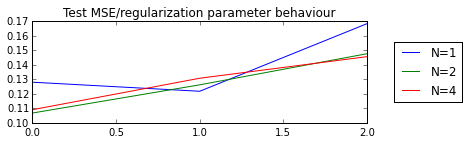

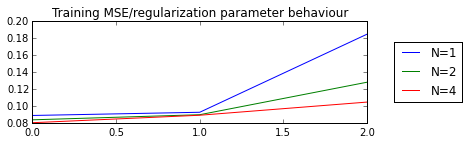

In [96]:

train_err_N1 = [0.0886651,0.0924557,0.1848709]
test_err_N1 = [0.1280122,0.1217590,0.1684274]
train_err_N2 = [0.0835232,0.0895637,0.1280231]
test_err_N2 = [0.1067284,0.1261931,0.1476811]
train_err_N4 = [0.0801008,0.08894393,0.10451584]
test_err_N4 = [0.10901801,0.13074456,0.14564664]


fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(test_err_N1,label = 'N=1')
ax.plot(test_err_N2,label = 'N=2')
ax.plot(test_err_N4,label = 'N=4')
ax.set_title('Test MSE/regularization parameter behaviour')
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
fig = plt.figure()
ax2 = fig.add_subplot(212)
ax2.set_title('Training MSE/regularization parameter behaviour')
ax2.plot(train_err_N1,label = 'N=1')
ax2.plot(train_err_N2,label = 'N=2')
ax2.plot(train_err_N4,label = 'N=4')
ax2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))


\vspace{5mm}

Above we have the behaviour of the test and training MSE changing the parameter µ changing  (that for simplicity i have assumed that µ1 = µ2 ). The regularization parameter µ has the task to penalize the error function and try to improve the smoothness of the function. Infact we know that the important stuff in machine learning is to reach a good test error instead to reach training error equal to zero. In our case we can see that the training error always increase as increase µ. For N = 1 we have an insteresting decrease of the test error but when we penalize the function too much the test MSE increase really together with the training error.

\vspace{5mm}

Now we'll see the behaviour of the errors increasing the complexity of the model therefore the number of the parameters for every choice of µ.

\vspace{5mm}



In [98]:
train_err_m01 = [0.0886651,0.0835232,0.0801008]
test_err_m01 = [0.1280122,0.1067284,0.10901801]
train_err_m2 = [0.0924557,0.0895637,0.08894393]
test_err_m2 = [0.1217590,0.1261931,0.13074456]
train_err_m20 = [0.1848709,0.1280231,0.10451584]
test_err_m20 = [0.1684274,0.1476811,0.14564664]

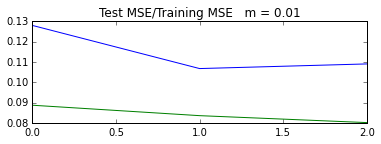

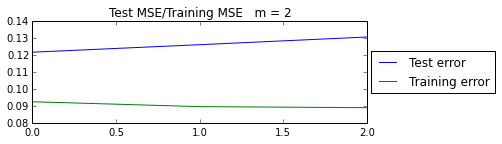

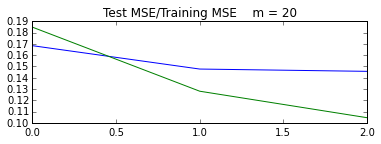

In [111]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(test_err_m01)
ax.plot(train_err_m01)
ax.set_title('Test MSE/Training MSE   m = 0.01')
ax.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(test_err_m2,label = 'Test error')
ax1.plot(train_err_m2,label = 'Training error')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Test MSE/Training MSE   m = 2')

fig = plt.figure()
ax2 = fig.add_subplot(212)
ax2.plot(test_err_m20)
ax2.plot(train_err_m20)
ax2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax2.set_title('Test MSE/Training MSE    m = 20')

\vspace{5mm}

It's clear from the figure that when increase the complexity of the model the training error tend to zero. It's more interesting see that the test error that have an U-shape (a really smooth U-shape in this case). Infact in general the expected test MSE can be always decomposed into sum of three fundamental quantities:

1) the variance of the estimated function $\hat{f}$ 
2) the squared bias of $\hat{f}$ 
3) the irriducible variance $\varepsilon$ 
\vspace{5mm}

the variance refers to the amount by which $\hat{f}$ change if we change also the data and the bias is the amount of error that you obtain when your model is too simple.